# Visualisation of age estimation distribution for all data sets


In [101]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
import json
import numpy as np

# Set the working directory to the src folder
os.chdir('/mnt/c/Dokumenter/Dokumenter/UNI/Master/Thesis/GitHub_Repo/Master_Thesis/data')


### Loading data

In [102]:
def load_data(path):
    f = open(path)
    data = json.load(f)
    df = pd.DataFrame.from_dict(data, orient='index', columns=['Age'])
    f.close()

    # removing nans
    nans = df['Age'].isna().sum()
    df = df.dropna()

    describe = df.describe()
    value_counts = df.value_counts()

    # make new column for the identity based on the index
    df['Identity'] = df.index
    df['Identity'] = df.index.str.rsplit('_', 1).str[0]

    df = df.sort_values(by='Age')

    df['Ethnicity'] = df['Identity'].str.split('_').str[0]

    return df, nans, describe, value_counts


In [103]:
df_YLFW = load_data('age_estimations/YLFW_output_data_precroped_all_age.json')[0]
df_YLFW.Age = df_YLFW.Age.astype(int)
df_YLFW = df_YLFW.sort_values(by='Age', ascending=True)



# DENNE VIRKER IKKE SUPER
df_RFW_african = load_data('age_estimations/data sendt fra Gabi senest/output_african.json')[0]
df_RFW_asian = load_data('age_estimations/data sendt fra Gabi senest/output_asian.json')[0]
df_RFW_caucasian = load_data('age_estimations/data sendt fra Gabi senest/output_caucasian.json')[0]
df_RFW_indian = load_data('age_estimations/data sendt fra Gabi senest/output_indian.json')[0]
df_RFW = pd.concat([df_RFW_african, df_RFW_asian, df_RFW_caucasian, df_RFW_indian])
df_RFW.Age = df_RFW.Age.astype(int)
df_RFW = df_RFW.sort_values(by='Age', ascending=True)


In [104]:
# ethnicity on RFW

# Define the path to the raw data directory
raw_data_path = '../data/raw_full/'

# Initialize lists to store image characteristics
img_names = []
ethnicities = []
face_ids = []
id_class = []

# Iterate through the directories of each ethnicity (e.g., 'Asian')
ethnicities_list = os.listdir(raw_data_path + 'RFW_full/data')
for ethnicity in ethnicities_list:
    ethnicity_dir = os.path.join(raw_data_path + 'RFW_full/data', ethnicity)
    if os.path.isdir(ethnicity_dir): # indside dir
        id_list = os.listdir(ethnicity_dir) # get ids
        for id_name in id_list:
            id = id_name.split('.')[1]
            print(id_name)

            ids_dir = os.path.join(ethnicity_dir, id_name)
            if os.path.isdir(ids_dir):
                for img_name in os.listdir(ids_dir):
                    if img_name.endswith('.jpg'):
                        # Extract information from image filename
                        image_name = os.path.splitext(img_name)[0]
                        image_info = image_name.split('_')
                        image_id = image_info[-1]

                        # Append image characteristics to lists
                        img_names.append(id_name)
                        ethnicities.append(ethnicity)
                        face_ids.append(image_id)
                        id_class.append(id)



# Create a DataFrame from the lists
data = {'img_name': img_names, 'ethnicity': ethnicities, 'id_class':id_class, 'face_id': face_ids}
df = pd.DataFrame(data)


m.010lz5
m.011y5k
m.01257s
m.0126y2
m.012f1d
m.012gl8
m.012gr9
m.012mh_
m.012mk7
m.012mmb
m.012qsp
m.012tmz
m.012vd6
m.012vk4
m.0139ps
m.013w7j
m.015m2v
m.015pz3
m.015q3m
m.0161fm
m.016j55
m.017729
m.018144
m.0183qt
m.0185gs
m.018n9d
m.018p19
m.01b_88
m.01c471
m.01cqbg
m.01c_3f
m.01d401
m.01dhw
m.01dqj6
m.01drbr
m.01dysq
m.01dz5n
m.01f97r
m.01flf5
m.01fmdk
m.01g6b
m.01gk2f
m.01gq_9
m.01hw2qh
m.01j4p1
m.01jjx5
m.01jpwfr
m.01jq08_
m.01jr5w
m.01jsgxb
m.01jxtkn
m.01k1bkq
m.01k358
m.01k4rx7
m.01k5tvx
m.01k5vjs
m.01k5wsd
m.01kb1dx
m.01kcgj
m.01kcx_w
m.01kcys
m.01kgz7q
m.01kp9_8
m.01kq4tc
m.01ksvq4
m.01kx43w
m.01ky6fb
m.01ky6yy
m.01kys2
m.01l19b_
m.01l1v5n
m.01l5rfm
m.01l7mwv
m.01ld7zl
m.01lk16_
m.01lkv4c
m.01llxc4
m.01lmtl
m.01lnq_p
m.01lqkw_
m.01lsdlr
m.01lsq2k
m.01lv4nd
m.01lvcs1
m.01l_04j
m.01m0w5f
m.01m3hxr
m.01m40k5
m.01m4fhv
m.01m89jz
m.01mddpy
m.01mfmqw
m.01mjyj0
m.01mm508
m.01mm6vh
m.01mm_tv
m.01mn70j
m.01mq7_r
m.01mqdhm
m.01mqs5f
m.01mrnp
m.01mtsrk
m.01mvcd1
m.01mvw82
m.01mwy2h
m.01

In [105]:
# Gabis RFW er df
df.describe()
df_RFW_gab_org = df.copy()

In [106]:
# renaming img_name to Identity
df_RFW_gab_org = df_RFW_gab_org.rename(columns={'img_name':'Identity'})

In [107]:
df_RFW_gab_org

,Identity,ethnicity,id_class,face_id
0,m.010lz5,African,010lz5,0001
1,m.010lz5,African,010lz5,0002
2,m.010lz5,African,010lz5,0003
3,m.011y5k,African,011y5k,0001
4,m.011y5k,African,011y5k,0002
...,...,...,...,...
40602,m.0vshsz9,Indian,0vshsz9,0003
40603,m.0_4pw,Indian,0_4pw,0001
40604,m.0_4pw,Indian,0_4pw,0002
40605,m.0_4pw,Indian,0_4pw,0003


In [108]:
# min RFW er df_RFW
df_RFW.describe()
df_RFW_org = df_RFW.copy()

In [109]:
df_RFW_org

,Age,Identity,Ethnicity
m.0263vl0_0001,2,m.0263vl0,m.0263vl0
m.0gc2zgn_0001,2,m.0gc2zgn,m.0gc2zgn
m.018fwb_0003,3,m.018fwb,m.018fwb
m.03qcz13_0003,3,m.03qcz13,m.03qcz13
m.026m8l2_0001,4,m.026m8l2,m.026m8l2
...,...,...,...
m.04jmjyy_0001,87,m.04jmjyy,m.04jmjyy
m.07ssfl_0002,87,m.07ssfl,m.07ssfl
m.09v5jqn_0004,87,m.09v5jqn,m.09v5jqn
m.09tbzt_0003,88,m.09tbzt,m.09tbzt


In [112]:
# add ethnicity column from df as the Ethnicity column in df_RFW

### df.img_name = df_RFW.Identity

# merge dataframes based on Identity
# df_RFW = df_RFW.merge(df, right_on='img_name', left_on='Identity')
df_RFW_new = df_RFW.merge(df_RFW_gab_org, on='Identity', how='inner')


# merged_df = df_RFW.merge(right, on='P', how='outer')


In [113]:
df_RFW_new

,Age,Identity,Ethnicity,ethnicity,id_class,face_id
0,2,m.0263vl0,m.0263vl0,Caucasian,0263vl0,0001
1,2,m.0263vl0,m.0263vl0,Caucasian,0263vl0,0002
2,5,m.0263vl0,m.0263vl0,Caucasian,0263vl0,0001
3,5,m.0263vl0,m.0263vl0,Caucasian,0263vl0,0002
4,2,m.0gc2zgn,m.0gc2zgn,Indian,0gc2zgn,0001
...,...,...,...,...,...,...
154834,77,m.0bcvnb,m.0bcvnb,Caucasian,0bcvnb,0002
154835,77,m.0bcvnb,m.0bcvnb,Caucasian,0bcvnb,0003
154836,80,m.0bcvnb,m.0bcvnb,Caucasian,0bcvnb,0001
154837,80,m.0bcvnb,m.0bcvnb,Caucasian,0bcvnb,0002


In [74]:
# drop Ethnicity column and rename ethnicity to Ethnicity

df_RFW = df_RFW.drop(columns=['Ethnicity'])
df_RFW =df_RFW.rename(columns={"ethnicity":"Ethnicity"})


# How many of each identity

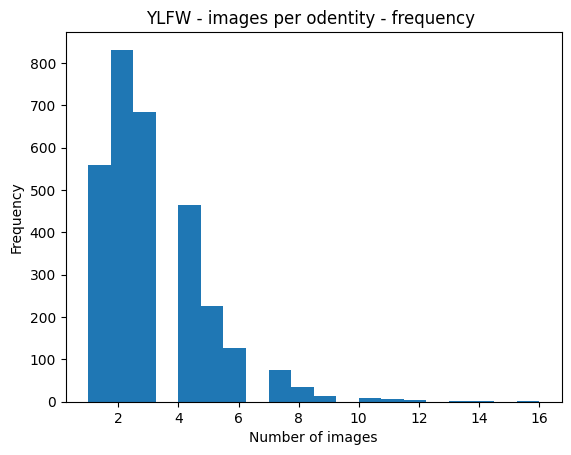

In [34]:
df_YLFW['Identity'].value_counts()
# plot amount of the same identity
df_YLFW['Identity'].value_counts().plot(kind='hist', bins=20)
plt.title('YLFW - images per odentity - frequency ')
plt.xlabel('Number of images')
plt.show()

In [35]:
print(df_YLFW['Identity'].describe())
df_YLFW['Identity'].value_counts().mean()

count           9229
unique          3042
top       Indian_602
freq              16
Name: Identity, dtype: object


3.0338593030900722

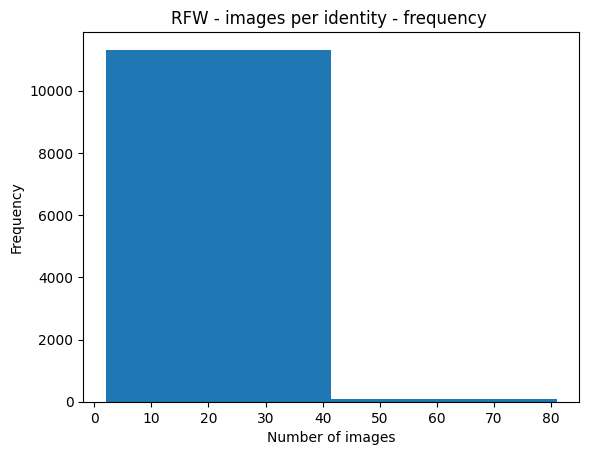

In [75]:
df_RFW['Identity'].value_counts()
# plot amount of the same identity
df_RFW['Identity'].value_counts().plot(kind='hist', bins=2)
plt.xlabel('Number of images')
plt.title('RFW - images per identity - frequency ')
plt.show()


In [76]:
print(df_RFW['Identity'].describe())
print(df_RFW['Identity'].value_counts().mean())

count        154839
unique        11416
top       m.02qzvw6
freq             81
Name: Identity, dtype: object
13.56333216538192


## Plotting the distribution

In [38]:
def plot_demographic_distribution(df, title, column="Age", bins=30, color="skyblue", figsize=(10, 6)):
    """
    Plots an improved histogram with a kernel density estimate for the specified column.

    Parameters:
    - df: Pandas DataFrame.
    - column: str, default "Age"
        The column name to be used for the histogram.
    - bins: int, default 30
        The number of bins to use for the histogram.
    - color: str, default "skyblue"
        The color of the histogram bars.
    - figsize: tuple, default (10, 6)
        The dimensions for the figure size.
    """
    plt.figure(figsize=figsize)  # Set figure size
    sns.histplot(data=df, x=column, bins=bins, color=color, kde=True)  # Histogram with KDE
    plt.title(f"{column} Distribution - {title}")  # Dynamic title based on the column name
    plt.xlabel(column)  # Label for the x-axis
    plt.ylabel("Count")  # Label for the y-axis
    plt.xticks(rotation=-45)  # Rotate x-axis labels
    plt.grid(False)  # Disable grid lines for cleaner look

    # Improve the layout and show the plot
    plt.tight_layout()
    plt.show()


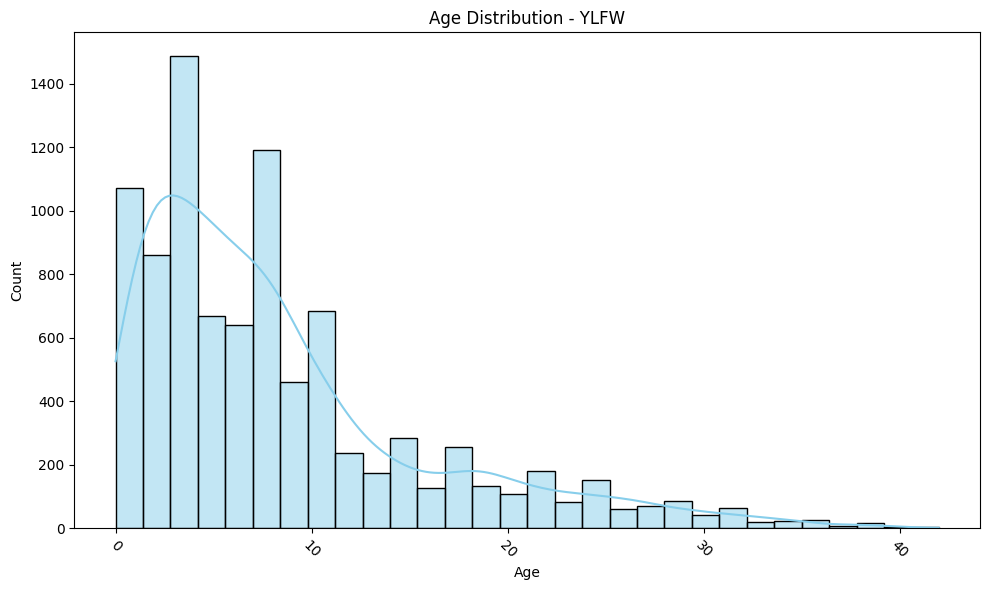

In [39]:
plot_demographic_distribution(df_YLFW, 'YLFW', column="Age", bins=30, color="skyblue", figsize=(10, 6))

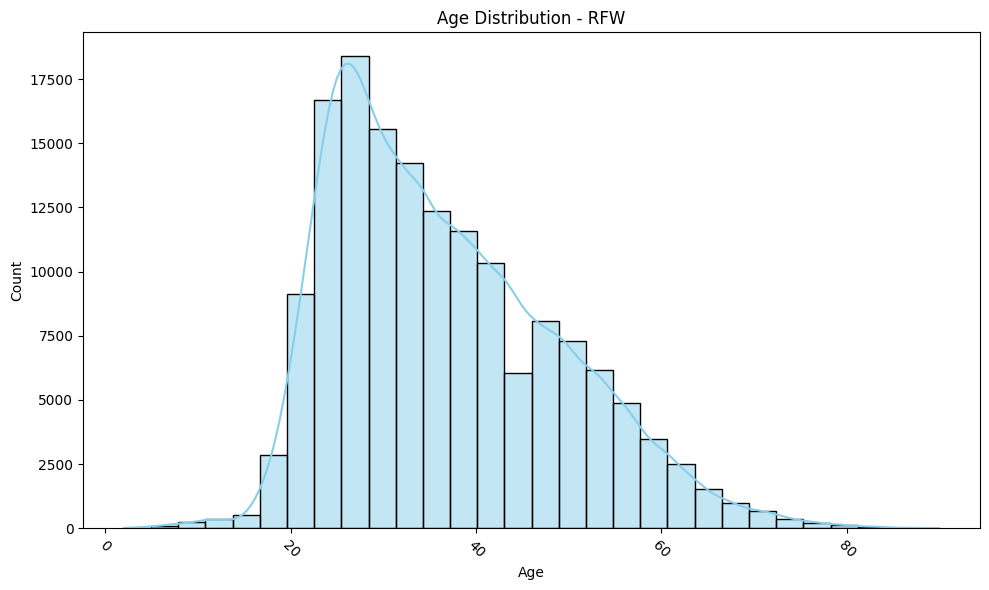

In [40]:
plot_demographic_distribution(df_RFW,'RFW', column="Age", bins=30, color="skyblue", figsize=(10, 6))

### Childrens ages

In [77]:
def plot_age_group_distribution(df, title, figsize=(10, 6)):
    """
    Plots the distribution of age groups within the provided DataFrame.

    Parameters:
    - df: Pandas DataFrame containing an 'Age' column.
    - figsize: tuple, optional, default (10, 6)
        The dimensions for the figure size.
    """
    # Ensure 'Age' is of type integer
    df['Age'] = df['Age'].astype(int)

    # Define the age groups and corresponding labels
    age_bins = [0, 4, 7, 10, 13, 16, 19]  # adding one more bin for 16-18
    age_labels = ['0-3', '4-6', '7-9', '10-12', '13-15', '16-18']

    # Update the DataFrame with age groupings
    df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

    # Create the bar plot for the age groups
    plt.figure(figsize=figsize)
    ax = sns.countplot(data=df, x='Age Group', palette='coolwarm')
    plt.title(f"Age Group Distribution - {title}")
    plt.xlabel("Age Group")
    plt.ylabel("# images")
    plt.xticks(rotation=45)
    plt.grid(axis='y')

    # Add value counts to the top of each bar
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 5), textcoords='offset points')

    # Show the plot
    plt.tight_layout()
    plt.show()

    return df


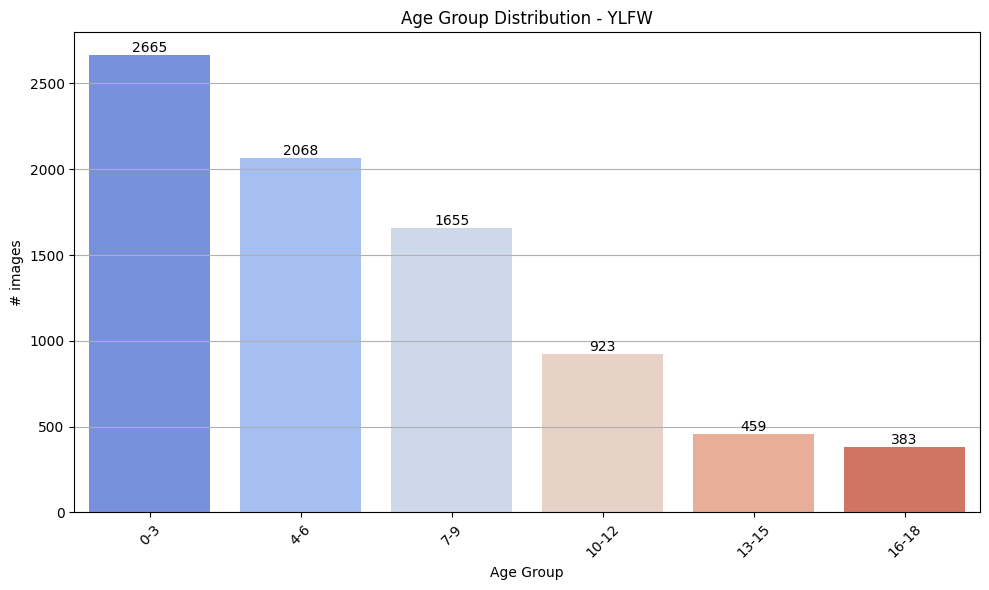

,Age,Identity,Ethnicity,Age Group
Indian_40_34,0,Indian_40,Indian,0-3
Caucasian_134_4,0,Caucasian_134,Caucasian,0-3
Caucasian_1276_4,0,Caucasian_1276,Caucasian,0-3
Asian_624_4,0,Asian_624,Asian,0-3
Caucasian_1001_3,0,Caucasian_1001,Caucasian,0-3
...,...,...,...,...
Indian_330_1,40,Indian_330,Indian,NaN
Asian_531_0,40,Asian_531,Asian,NaN
Indian_440_0,41,Indian_440,Indian,NaN
Indian_287_22,42,Indian_287,Indian,NaN


In [78]:
plot_age_group_distribution(df_YLFW, 'YLFW')

In [80]:
df_RFW

,Age,Identity,img_name,Ethnicity,id_class,face_id,Age Group
0,2,m.0263vl0,m.0263vl0,Caucasian,0263vl0,0001,0-3
1,2,m.0263vl0,m.0263vl0,Caucasian,0263vl0,0002,0-3
2,5,m.0263vl0,m.0263vl0,Caucasian,0263vl0,0001,4-6
3,5,m.0263vl0,m.0263vl0,Caucasian,0263vl0,0002,4-6
4,2,m.0gc2zgn,m.0gc2zgn,Indian,0gc2zgn,0001,0-3
...,...,...,...,...,...,...,...
154834,77,m.0bcvnb,m.0bcvnb,Caucasian,0bcvnb,0002,NaN
154835,77,m.0bcvnb,m.0bcvnb,Caucasian,0bcvnb,0003,NaN
154836,80,m.0bcvnb,m.0bcvnb,Caucasian,0bcvnb,0001,NaN
154837,80,m.0bcvnb,m.0bcvnb,Caucasian,0bcvnb,0002,NaN


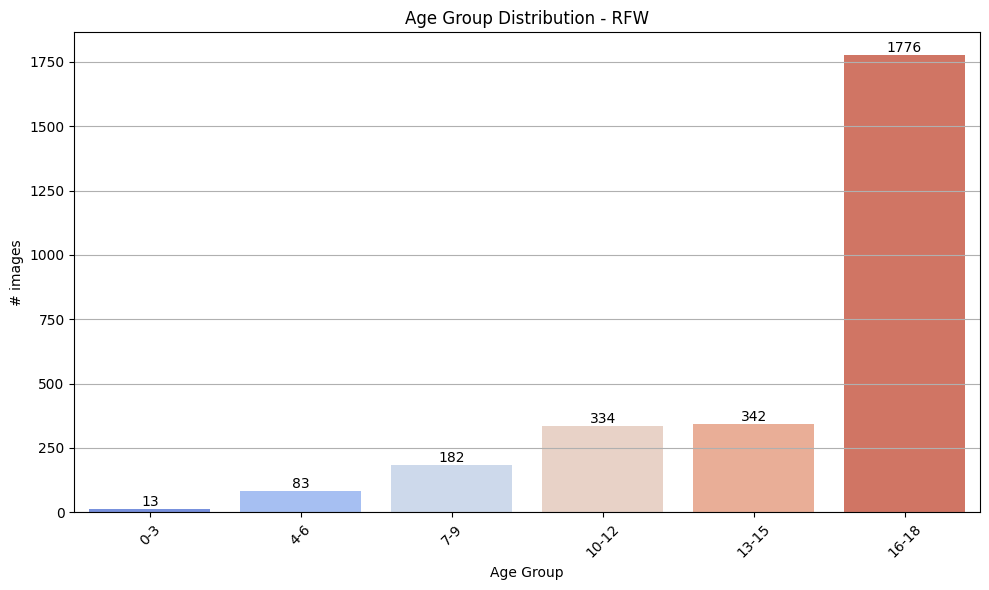

,Age,Identity,img_name,Ethnicity,id_class,face_id,Age Group
0,2,m.0263vl0,m.0263vl0,Caucasian,0263vl0,0001,0-3
1,2,m.0263vl0,m.0263vl0,Caucasian,0263vl0,0002,0-3
2,5,m.0263vl0,m.0263vl0,Caucasian,0263vl0,0001,4-6
3,5,m.0263vl0,m.0263vl0,Caucasian,0263vl0,0002,4-6
4,2,m.0gc2zgn,m.0gc2zgn,Indian,0gc2zgn,0001,0-3
...,...,...,...,...,...,...,...
154834,77,m.0bcvnb,m.0bcvnb,Caucasian,0bcvnb,0002,NaN
154835,77,m.0bcvnb,m.0bcvnb,Caucasian,0bcvnb,0003,NaN
154836,80,m.0bcvnb,m.0bcvnb,Caucasian,0bcvnb,0001,NaN
154837,80,m.0bcvnb,m.0bcvnb,Caucasian,0bcvnb,0002,NaN


In [79]:
plot_age_group_distribution(df_RFW, 'RFW')

16-18    1776
13-15     342
10-12     334
7-9       182
4-6        83
0-3        13
Name: Age Group, dtype: int64

# YLFW and RFW combined

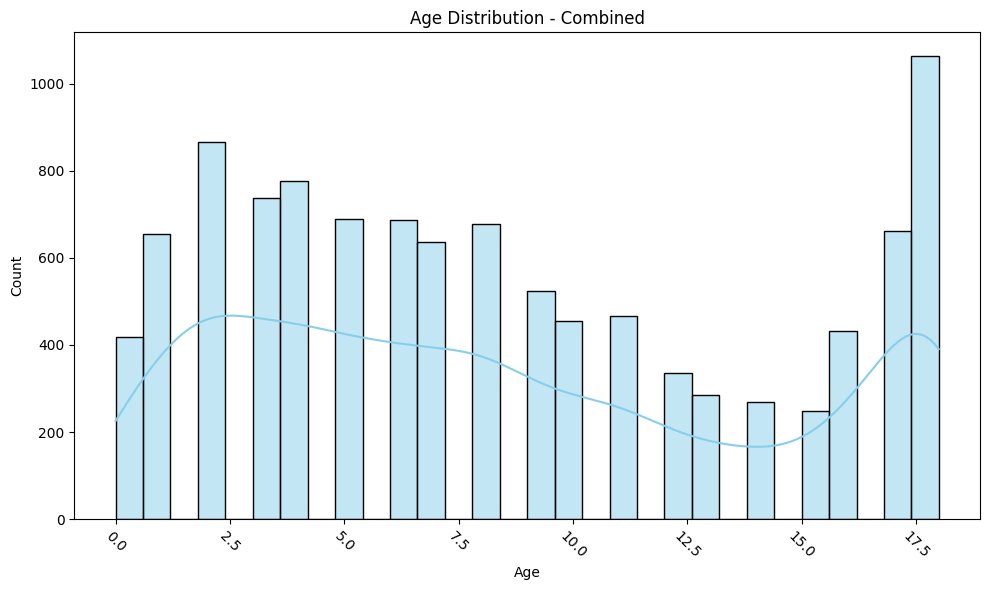

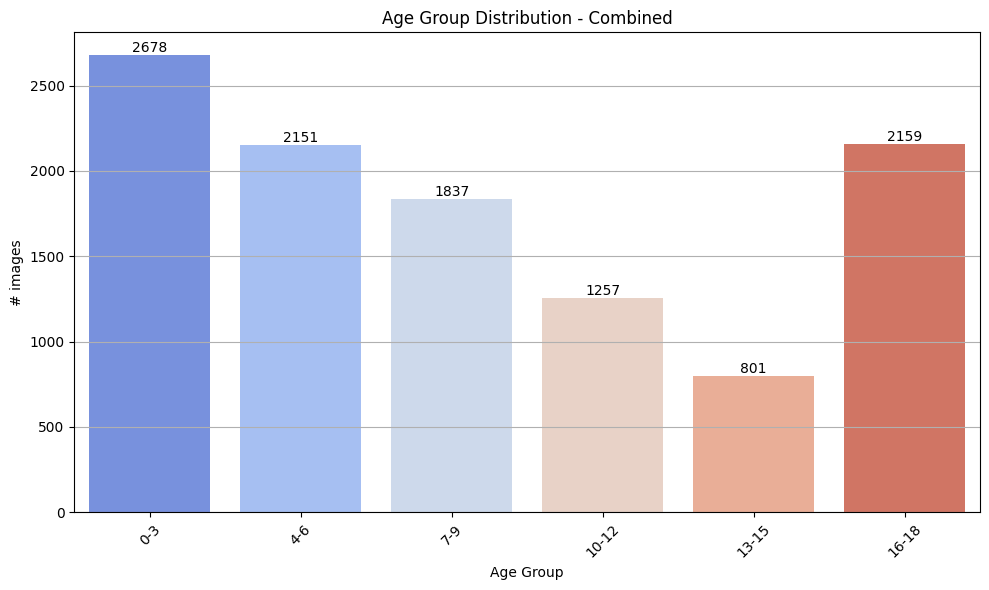

,Age,Identity,Ethnicity,Age Group,Identity Count,Mean Age,img_name,id_class,face_id
Indian_40_34,0,Indian_40,Indian,0-3,11.0,4.000000,NaN,NaN,NaN
Caucasian_1030_18,0,Caucasian_1030,Caucasian,0-3,2.0,0.000000,NaN,NaN,NaN
Asian_232_25,0,Asian_232,Asian,0-3,4.0,1.750000,NaN,NaN,NaN
Caucasian_518_9,0,Caucasian_518,Caucasian,0-3,3.0,1.333333,NaN,NaN,NaN
Asian_290_2,0,Asian_290,Asian,0-3,3.0,1.333333,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
4120,18,m.03mhsl,Caucasian,16-18,NaN,NaN,m.03mhsl,03mhsl,0001
4121,18,m.03mhsl,Caucasian,16-18,NaN,NaN,m.03mhsl,03mhsl,0002
4122,18,m.03mhsl,Caucasian,16-18,NaN,NaN,m.03mhsl,03mhsl,0003
4048,18,m.04gqx5q,African,16-18,NaN,NaN,m.04gqx5q,04gqx5q,0001


In [57]:
# combine the two dataframes

df_combined = pd.concat([df_YLFW, df_RFW])
df_combined = df_combined.dropna(subset=['Age Group'])
df_combined = df_combined.sort_values(by='Age')

plot_demographic_distribution(df_combined, 'Combined', column="Age", bins=30, color="skyblue", figsize=(10, 6))

plot_age_group_distribution(df_combined, 'Combined')


# Mated and non-meated

A function that counts images per identity and if there are more than one image for the identity 

In [46]:
print(df_combined['Identity'].value_counts())

# add value_counts to the dataframe to each identity
df_combined['Identity Count'] = df_combined['Identity'].map(df_combined['Identity'].value_counts())

# for each identity, get the mean age of all their value_counts
df_combined['Mean Age'] = df_combined.groupby('Identity')['Age'].transform('mean')


m.0bs1m9w    49
m.03qcz13    25
m.0lq5svr    25
m.02pstft    25
m.0kvclh4    24
             ..
m.0ds9hhq     2
m.052_0jg     2
m.01mqdhm     2
m.0bzpc2      2
m.04074lf     2
Name: Identity, Length: 425, dtype: int64


In [47]:
# adding a column that is a 1 if there are 2 or more images per identity and 0 if there is only one image
df_combined['Mated'] = np.where(df_combined['Identity Count'] > 1, 1, 0)
df_combined['Mated'].value_counts()

1    2730
Name: Mated, dtype: int64

In [ ]:
df_combined['Identity Count'].value_counts()

# non-mated : count af 1-taller burde passe med 855

# Plot: number of images in each age group colored by mated 


In [54]:
# number of images in each age group colored by mated

def plot_age_group_distribution_mated(df, title, figsize=(10, 6)):
    """
    Plots the distribution of age groups within the provided DataFrame.

    Parameters:
    - df: Pandas DataFrame containing an 'Age' column.
    - figsize: tuple, optional, default (10, 6)
        The dimensions for the figure size.
    """
    # Ensure 'Age' is of type integer
    df['Age'] = df['Age'].astype(int)

    # Define the age groups and corresponding labels
    age_bins = [0, 4, 7, 10, 13, 16, 19]  # adding one more bin for 16-18
    age_labels = ['0-3', '4-6', '7-9', '10-12', '13-15', '16-18']

    # Update the DataFrame with age groupings
    df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

    # Create the bar plot for the age groups
    plt.figure(figsize=figsize)
    ax = sns.countplot(data=df, x='Age Group', hue='Mated', palette='coolwarm')
    plt.title(f"Age Group Distribution - {title}")
    plt.xlabel("Age Group")
    plt.ylabel("# images")
    plt.xticks(rotation=45)
    plt.grid(axis='y')

    # Add value counts to the top of each bar
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 5), textcoords='offset points')

    # Show the plot
    plt.tight_layout()
    plt.show()

    return df

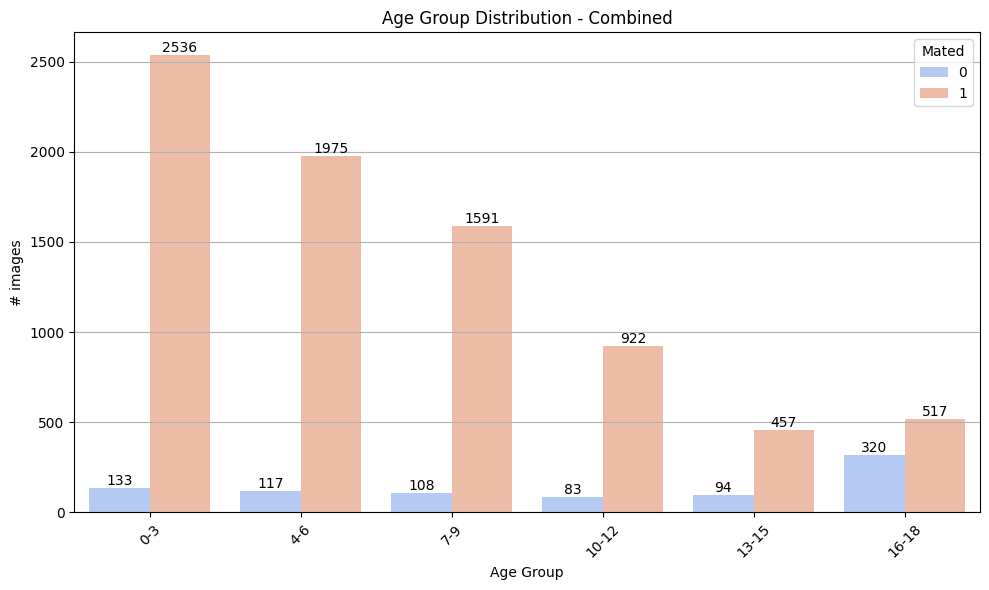

,Age,Identity,Age Group,Identity Count,Mean Age,Mated
Indian_40_34,0,Indian_40,0-3,10,2.300000,1
Caucasian_1030_18,0,Caucasian_1030,0-3,2,0.000000,1
Asian_232_25,0,Asian_232,0-3,4,1.750000,1
Caucasian_518_9,0,Caucasian_518,0-3,3,1.333333,1
Asian_290_2,0,Asian_290,0-3,3,1.333333,1
...,...,...,...,...,...,...
African_172_56,18,African_172,16-18,4,15.500000,1
African_413_1,18,African_413,16-18,2,17.000000,1
African_159_3,18,African_159,16-18,2,16.000000,1
Asian_28_0,18,Asian_28,16-18,6,15.666667,1


In [55]:
plot_age_group_distribution_mated(df_combined, 'Combined')

# Plot: number of images per identity



In [53]:
df_YLFW.head()

,Age,Identity,Age Group
Indian_40_34,0,Indian_40,0-3
Caucasian_134_4,0,Caucasian_134,0-3
Caucasian_1276_4,0,Caucasian_1276,0-3
Asian_624_4,0,Asian_624,0-3
Caucasian_1001_3,0,Caucasian_1001,0-3


In [54]:
# count identities
print(df_YLFW['Identity'].value_counts())

#count unique identities
print(df_YLFW['Identity'].nunique())


Indian_602      16
Indian_528      14
Indian_484      13
Indian_613      13
African_318     12
                ..
Indian_425       1
Caucasian_76     1
Caucasian_9      1
Caucasian_67     1
Indian_440       1
Name: Identity, Length: 3042, dtype: int64
3042


In [55]:
image_counts = df_YLFW['Identity'].value_counts().reset_index()
image_counts.columns = ['Identity', 'Image Count']


In [56]:
def plot_images_per_identity_distribution(df, title, figsize=(10, 6)):
    """
    Plots the distribution of the number of images per identity within the provided DataFrame.

    Parameters:
    - df: Pandas DataFrame containing an 'Identity' column.
    - figsize: tuple, optional, default (10, 6)
        The dimensions for the figure size.
    """
    # Count the number of images per identity
    image_counts = df['Identity'].value_counts().reset_index()
    image_counts.columns = ['Identity', 'Image Count']

    # Create the plot
    plt.figure(figsize=figsize)
    ax = sns.barplot(data=image_counts, x='Identity', y='Image Count', palette='coolwarm')
    plt.title(f"Number of Images per Identity - {title}")
    plt.xlabel("Identity")
    plt.ylabel("Number of Images")
    plt.xticks([])  # Hide x-axis ticks
    plt.grid(axis='y')

    # Show the plot with a better layout
    plt.tight_layout()
    plt.show()


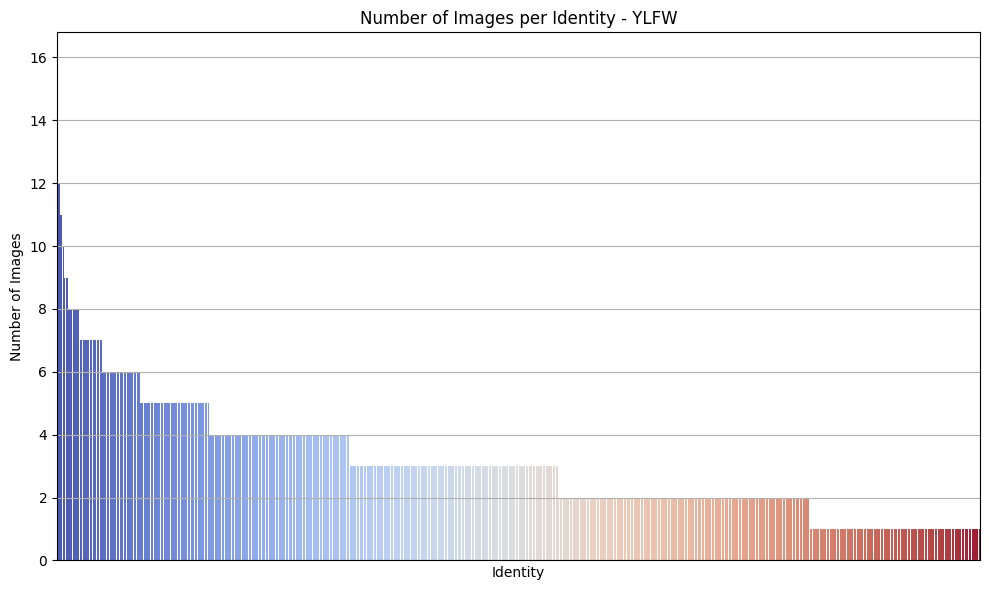

In [57]:
plot_images_per_identity_distribution(df_YLFW, 'YLFW')

# Plot: number of images per identity for each race

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_images_per_identity_per_race_distribution(df,title, figsize=(10, 6)):
    """
    Plots the distribution of the number of images per identity, grouped by race, within the provided DataFrame.

    Parameters:
    - df: Pandas DataFrame containing an 'Identity' column with race and identity information.
    - figsize: tuple, optional, default (10, 6)
        The dimensions for the figure size.
    """
    # Extract race from the 'Identity' column
    df['Race'] = df['Identity'].apply(lambda x: x.split('_')[0])

    # Count the number of images per identity per race
    image_counts = df.groupby(['Race', 'Identity']).size().reset_index(name='Image Count')

    # Sort the DataFrame for better visualization
    image_counts.sort_values(by=['Race', 'Image Count'], ascending=[True, False], inplace=True)

    # Create the plot
    plt.figure(figsize=figsize)
    sns.barplot(data=image_counts, x='Identity', y='Image Count', hue='Race', palette='coolwarm')
    plt.title(f"Number of Images per Identity per Race - {title}")
    plt.xlabel("Identity")
    plt.ylabel("Number of Images")
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
    plt.grid(axis='y')

    # Hide x-axis labels to avoid clutter
    plt.xticks([])

    # Improve the layout and show the plot
    plt.tight_layout()
    plt.show()


### Denne herunder tager lang tid 

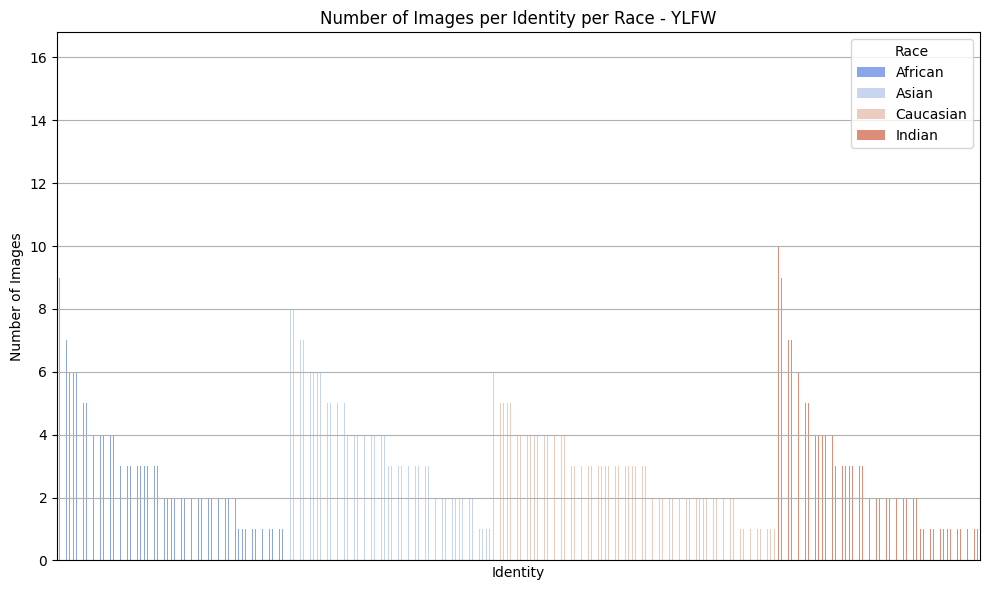

In [59]:
plot_images_per_identity_per_race_distribution(df_YLFW, 'YLFW')

In [60]:
df = df_YLFW
df['Race'] = df['Identity'].apply(lambda x: x.split('_')[0])
image_counts = df.groupby(['Race', 'Identity']).size().reset_index(name='Image Count')
image_counts.sort_values(by=['Race', 'Image Count'], ascending=[True, False], inplace=True)
print(image_counts.head())

# drop all rows with image count 1
# These images are usefull in the open-set identification task, but not in the closed-set identification task
image_counts = image_counts[image_counts['Image Count'] > 1]
print(image_counts.head())

        Race     Identity  Image Count
16   African  African_113           12
188  African  African_285           12
225  African  African_318           12
223  African  African_316           11
94   African  African_191           10
        Race     Identity  Image Count
16   African  African_113           12
188  African  African_285           12
225  African  African_318           12
223  African  African_316           11
94   African  African_191           10


In [61]:
# Extract race from the 'Identity' column
df = df_YLFW
df['Race'] = df['Identity'].apply(lambda x: x.split('_')[0])

# Count the number of images per identity per race
image_counts = df.groupby(['Race', 'Identity']).size().reset_index(name='Image Count')
image_counts.head()

,Race,Identity,Image Count
0,African,African_0,2
1,African,African_1,2
2,African,African_10,4
3,African,African_100,2
4,African,African_101,2


In [62]:
# boxplot of number of images peridentity per race
def plot_boxplot_images_per_identity_per_race(df,title, figsize=(10, 6)):
    """
    Plots a boxplot showing the distribution of the number of images per identity, grouped by race,
    within the provided DataFrame.

    Parameters:
    - df: Pandas DataFrame containing an 'Identity' column with race and identity information.
    - figsize: tuple, optional, default (10, 6)
        The dimensions for the figure size.
    """
    # Extract race from the 'Identity' column
    df['Race'] = df['Identity'].apply(lambda x: x.split('_')[0])

    # Count the number of images per identity per race
    image_counts = df.groupby(['Race', 'Identity']).size().reset_index(name='Image Count')

    # excluding the ones 1 image per identity
    image_counts = image_counts[image_counts['Image Count'] > 1]

    # Create the boxplot
    plt.figure(figsize=figsize)
    sns.boxplot(data=image_counts, x='Race', y='Image Count', palette='coolwarm')
    plt.title(f"Distribution of Images per Identity per Race - {title}")
    plt.xlabel("Race")
    plt.ylabel("Number of Images")

    # Improve the layout and show the plot
    plt.tight_layout()
    plt.show()


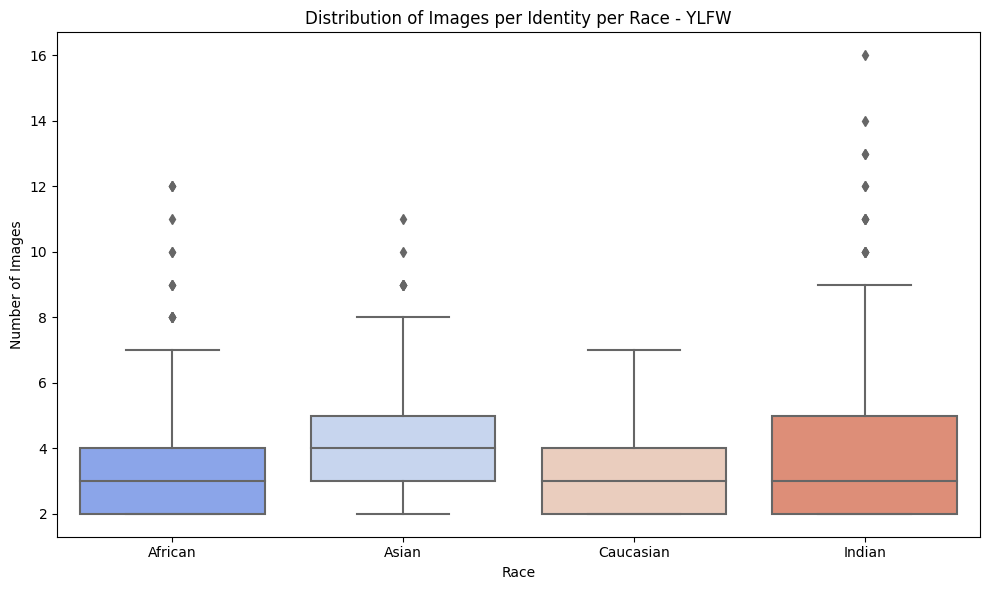

In [63]:
plot_boxplot_images_per_identity_per_race(df_YLFW, 'YLFW')